In [6]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymc as pm
import random


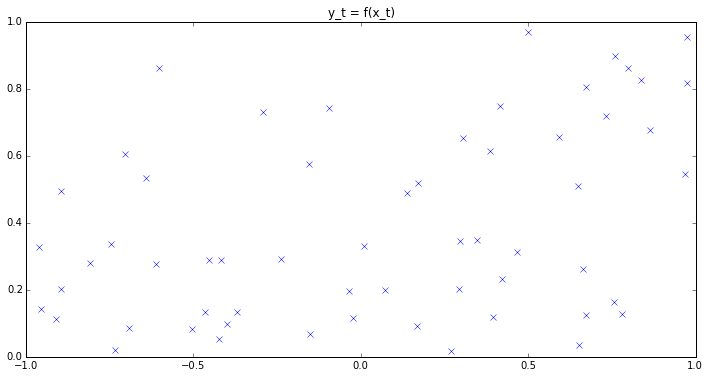

In [11]:
# generate data

random.seed(1234)

def f(x):
    return (3 * x*x + x) /4

N = 100
sigma_eps = 0.4
x_t = np.array(stats.uniform.rvs(loc=-1, scale=2, size=N)) 
y_t = f(x_t) + np.array(stats.norm.rvs(scale=sigma_eps, size=N))

figsize(12,6)
plt.title("y_t = f(x_t)")
plt.plot(x_t, y_t, 'x')
plt.legend()
plt.xlim((-1, 1))
plt.ylim((0, 1))
plt.show()

 [-----------------100%-----------------] 50000 of 50000 complete in 7.1 secPlotting std1
Plotting a1
Plotting b1


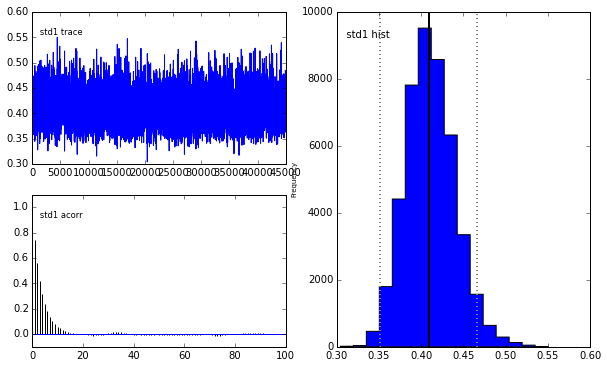

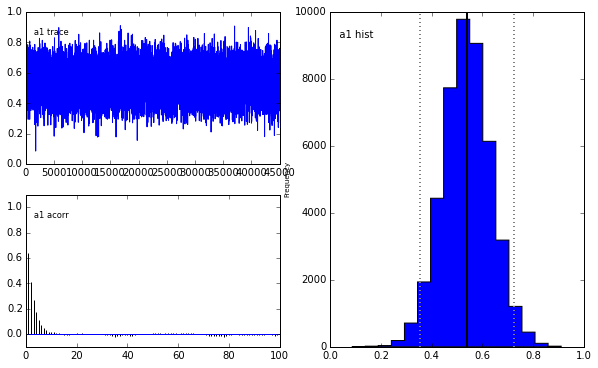

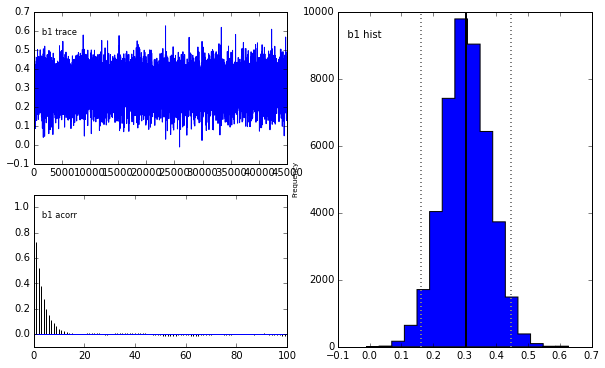

In [12]:
import pymc as pm
from pymc.Matplot import plot as mcplot


std1 = pm.Uniform("std1", 0, 1)  # this needs to be explained.

@pm.deterministic
def prec1(U=std1):
    return 1.0 / (U) ** 2

a1 = pm.Uniform("a1", -1, 1)
b1 = pm.Uniform("b1", -1, 1)

@pm.deterministic
def mean1(X=x_t, a1=a1, b1=b1):
    return (a1 * x_t * x_t + b1 * x_t)

obs1 = pm.Normal("obs1", mean1, prec1, value=y_t, observed=True)
mcmc1 = pm.MCMC([obs1, a1, b1, std1])

mcmc1.sample(50000, 5000)

mcplot(mcmc1)

 [-----------------100%-----------------] 50000 of 50000 complete in 4.5 secPlotting b2
Plotting a2
Plotting std2


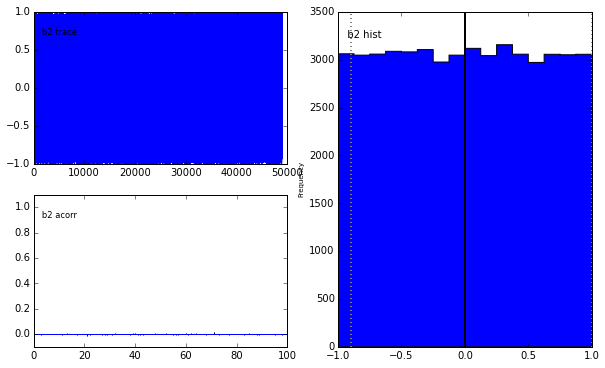

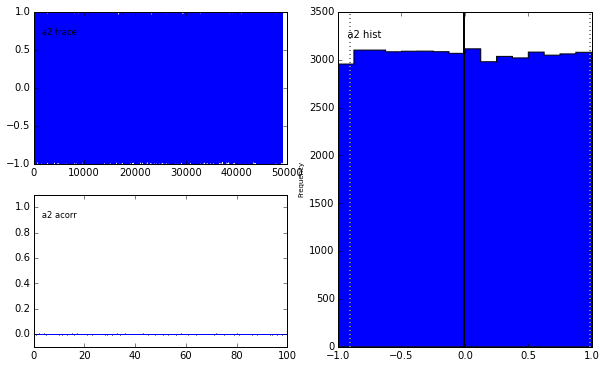

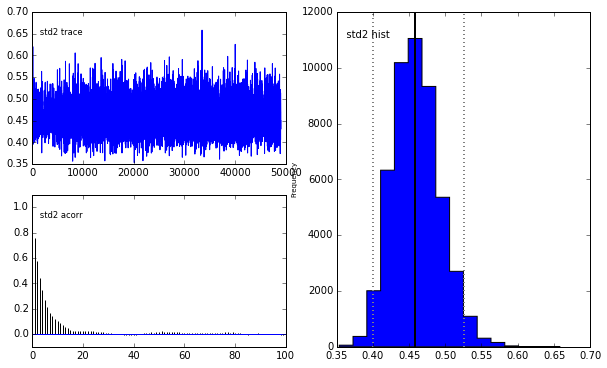

In [13]:
import pymc as pm
from pymc.Matplot import plot as mcplot

std2 = pm.Uniform("std2", 0, 1)  # this needs to be explained.

@pm.deterministic
def prec2(U=std2):
    return 1.0 / (U) ** 2

a2 = pm.Uniform("a2", -1, 1)
b2 = pm.Uniform("b2", -1, 1)

@pm.deterministic
def mean2(X=x_t, a1=a1, b1=b1):
    return (a1 * x_t + b1)

obs2 = pm.Normal("obs2", mean2, prec2, value=y_t, observed=True)
mcmc2 = pm.MCMC([obs2, a2, b2, std2])

mcmc2.sample(50000, 1000)

mcplot(mcmc2)

 [-----------------100%-----------------] 50000 of 50000 complete in 19.8 secPlotting b2
Plotting std2
Plotting b1
Plotting a1
Plotting std1
Plotting choice
Plotting q
Plotting a2


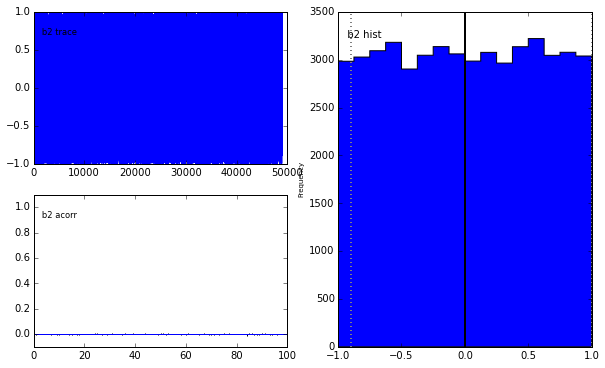

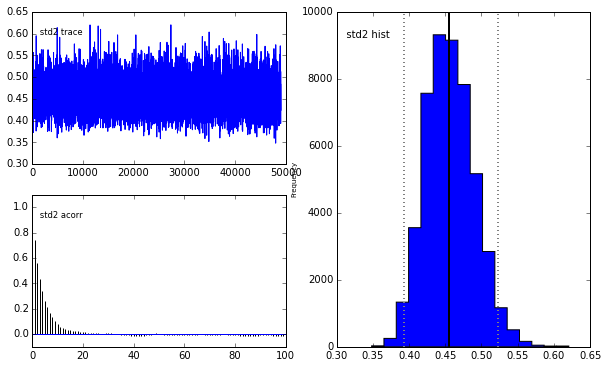

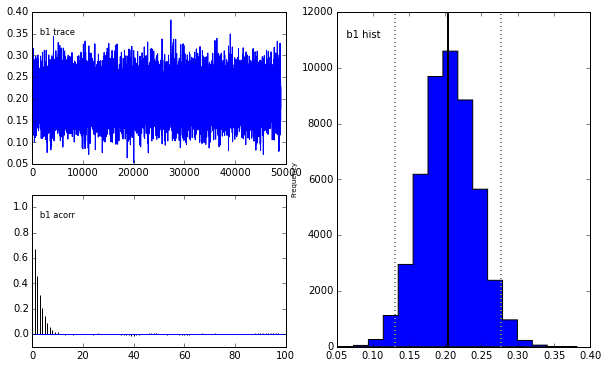

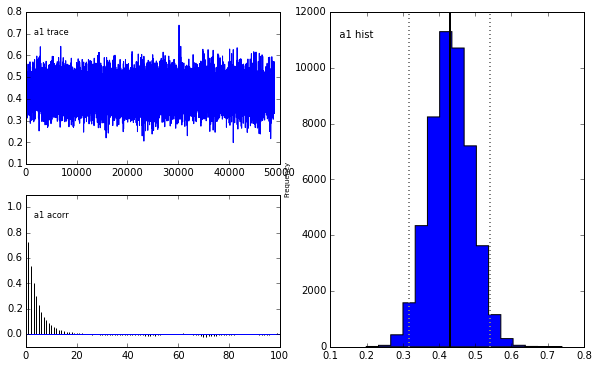

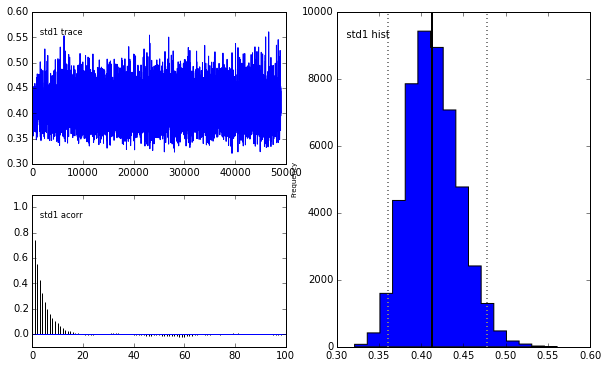

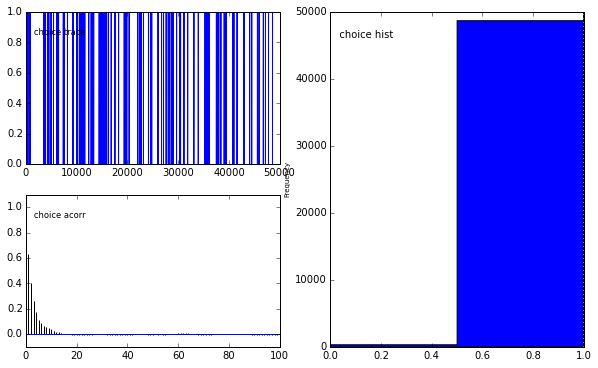

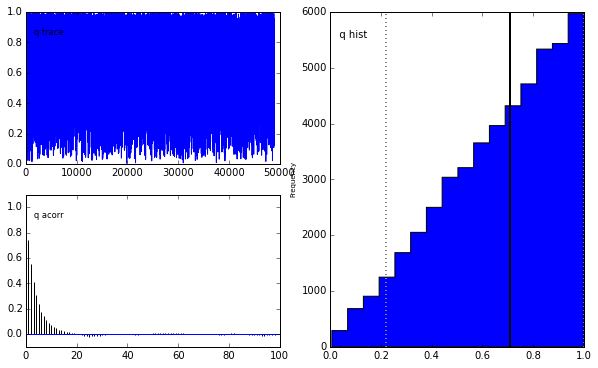

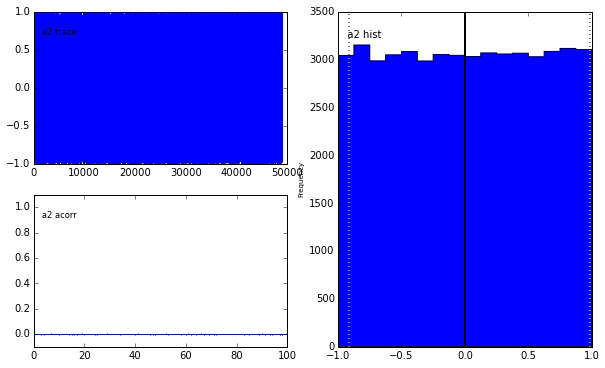

In [14]:
import pymc as pm
from pymc.Matplot import plot as mcplot


std = pm.Uniform("std", 0, 1)  # this needs to be explained.

@pm.deterministic
def prec(U=std):
    return 1.0 / (U) ** 2

q = pm.Uniform("q", 0, 1)
choice = pm.Binomial("choice", n=1, p=q)

@pm.deterministic
def mean(mean1=mean1, mean2=mean2, choice=choice):
    return choice * mean1 + (1-choice) * mean2

obs3 = pm.Normal("obs3", mean, prec, value=y_t, observed=True)
mcmc3 = pm.MCMC([obs3, a1, b1, std1, a2, b2, std2, q, choice])

mcmc3.sample(50000, 1000)

mcplot(mcmc3)